{'Hello': 123, 'Nivriti': 6780}


<BarContainer object of 2 artists>

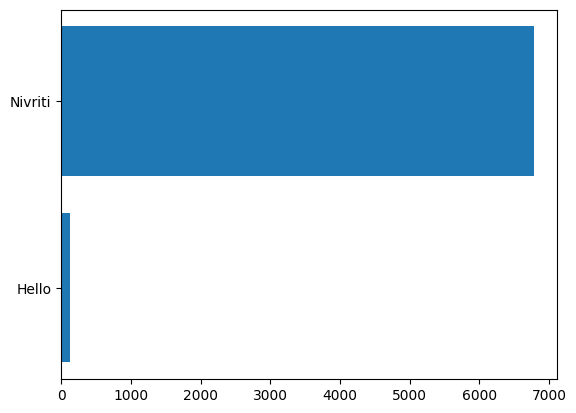

In [1]:
import matplotlib.pyplot as plt
from data.array import array_data
import numpy as np

print(array_data.data)

group_data = list(array_data.data.values())
group_names = list(array_data.data.keys())
group_mean = np.mean(group_data)
fig, ax = plt.subplots()
ax.barh(group_names, group_data)